In [49]:
%pylab inline
import json
import numpy as np
import sklearn.cluster as cluster
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import os
from collections import defaultdict
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [35]:
def parse_data_file(path):
    data = []
    with open(path, 'r') as fp:
        for line in fp:
            point = json.loads(line)
            text = point['text']
            data.append(text)
    return data
df = pd.DataFrame(parse_data_file('tweets.json'),columns=["Tweets"])
df["Clean Tweets"] = df['Tweets'].apply(lambda x: "".join(c for c in x if c not in ":-._"))\
                                 .apply(lambda x: x.replace('RT ',''))
df.head()

,Tweets,Clean Tweets
0,RT @ItsJennaMarbles: Reports of Marathon Runne...,@ItsJennaMarbles Reports of Marathon Runners t...
1,RT @NBCSN: Reports of Marathon Runners that cr...,@NBCSN Reports of Marathon Runners that crosse...
2,RT @NBCSN: Reports of Marathon Runners that cr...,@NBCSN Reports of Marathon Runners that crosse...
3,RT @PeterBurnsRadio: RT @NBCSN: Reports of Mar...,@PeterBurnsRadio @NBCSN Reports of Marathon Ru...
4,RT @NBCSN: Reports of Marathon Runners that cr...,@NBCSN Reports of Marathon Runners that crosse...


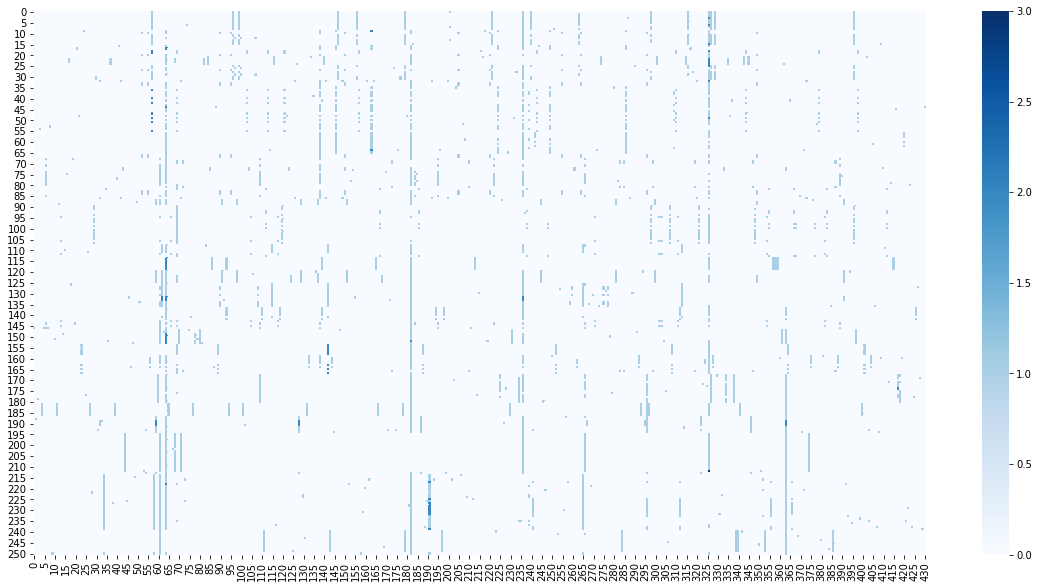

In [39]:
cv =CountVectorizer(stop_words='english')
X = cv.fit_transform(df['Tweets']).todense()
plt.figure(figsize=(20,10))
sns.heatmap(X,cmap='Blues')

In [40]:
cv.vocabulary_

{'04': 0,
 '0obrv4cqfp': 1,
 '0wxzos56pc': 2,
 '0wyochp3mz': 3,
 '11ertjdtaz': 4,
 '13': 5,
 '140': 6,
 '15': 7,
 '2cwu3p8g0x': 8,
 '2ddnpvzwr1': 9,
 '2sgzqt6oke': 10,
 '316': 11,
 '4055d0gjgd': 12,
 '45': 13,
 '4lq4fr2wgh': 14,
 '4sadjzdrv2': 15,
 '4uatk0dguw': 16,
 '4zsjgmnxuv': 17,
 '5dabhnx3he': 18,
 '6fzlgebjsj': 19,
 '6jvlrik6rc': 20,
 '6kuhcag7n4': 21,
 '6tfetdfbkg': 22,
 '800': 23,
 '8g9hhu2iui': 24,
 '8w6c1nljb9': 25,
 '8yp0pyzrgb': 26,
 '99': 27,
 '9aaptlxqqe': 28,
 '_bostonmarathon': 29,
 '_snape_': 30,
 'a4eicyho7r': 31,
 'abc': 32,
 'acthzj6a34': 33,
 'aerial': 34,
 'amen': 35,
 'anonnewsint': 36,
 'ap': 37,
 'ap3aw2zpzi': 38,
 'approach': 39,
 'apypvccjg2': 40,
 'ardkywccyi': 41,
 'area': 42,
 'arrest': 43,
 'arrested': 44,
 'aszqiiimnh': 45,
 'attacks': 46,
 'awtkpn7khb': 47,
 'awu2jb4bcw': 48,
 'awy6lzg7rg': 49,
 'b34qdgqoo9': 50,
 'b8972i7spi': 51,
 'bbcbreaking': 52,
 'bglobesports': 53,
 'black': 54,
 'blasts': 55,
 'blessed': 56,
 'blood': 57,
 'boat': 58,
 'bomb': 

Text(0.5,1,'Elbow curve')

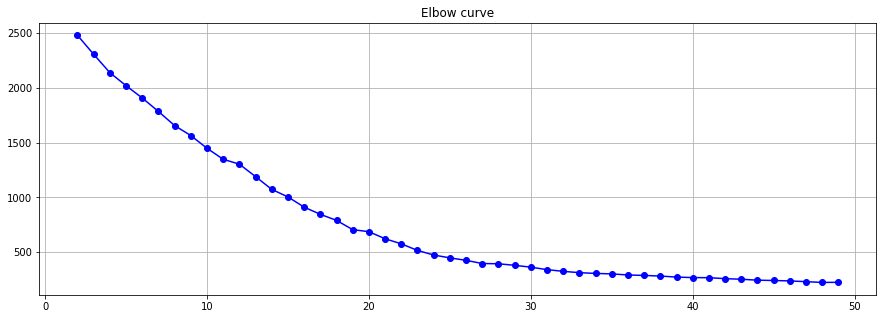

In [41]:
distorsions = []
for k in range(2, 50):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distorsions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')

In [44]:
# choosing elbow as 22...but this is highly subjective
k = 22
kmeans = cluster.KMeans(n_clusters=k,random_state=1)
clusters = kmeans.fit_predict(X)
state = [x+1 for x in range(len(parse_data_file('tweets.json')))]
assignments = list(zip(state, clusters))
groupings = defaultdict(list)
state_g = dict()
for s, c in assignments:
    groupings[c].append(s)
    state_g[s] = c
groupings_list = [(x,groupings[x],len(groupings[x])) for x in groupings]
groupings_list=sorted(groupings_list,key=lambda x:x[2],reverse=True)
for group in groupings_list:
    print(group)

(2, [73, 74, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 251], 29)
(19, [10, 17, 18, 36, 38, 39, 40, 44, 45, 46, 47, 49, 51, 53, 54, 55, 60, 62, 64, 65, 66], 21)
(1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 26, 27, 29, 30, 31, 32], 20)
(0, [196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213], 18)
(5, [22, 23, 24, 25, 33, 42, 57, 58, 59, 61, 63, 87, 160, 161, 162, 163, 165], 17)
(15, [109, 110, 111, 112, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 142], 16)
(6, [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181], 13)
(13, [69, 72, 75, 76, 77, 78, 79, 80, 81, 86, 145, 147], 12)
(4, [91, 92, 95, 97, 98, 100, 102, 103, 104, 105, 106, 108], 12)
(9, [241, 242, 243, 244, 245, 246, 247, 248, 249, 250], 10)
(8, [11, 21, 28, 34, 35, 67, 68, 84, 85], 9)
(3, [19, 20, 37, 41, 43, 48, 50, 52, 56], 9)
(14, [88, 89, 90, 121, 122, 123, 124, 125, 126

In [106]:
groupings_list[0][1]
"".join(df['Clean Tweets'][[x-1 for x in groupings_list[0][1]]].values.tolist())

'Boston Bombing Suspect Saudi National in Custody, Not Charged or Under Arrest \nFollowing the dual explosion http//tco/wPlEhOMS7iBoston Bombing Suspect Saudi National in Custody, Not Charged or Under Arrest \nFollowing the dual explosion http//tco/g9qXPBFZJaNew Aerial Images Show Boston Bombing Suspect In Boat http//tco/jG3W30uRZ5New Aerial Images Show Boston Bombing Suspect In Boat http//tco/aWY6LZg7RgGood info New Aerial Images Show Boston Bombing Suspect In Boat  #business #socialmedia http//tco/iUbYIL9TfuNew Aerial Images Show Boston Bombing Suspect In Boat Massachusetts State Police released five images taken o http//tco/n0Qe2LaO3aNew Aerial Images Show Boston Bombing Suspect In Boat http//tco/FQmTyN367i #Us #Boston #UsWorld #BostonMarathonNew Aerial Images Show Boston Bombing Suspect In Boat http//tco/NYlQSliBFv via @mashableNew Aerial Images Show Boston Bombing Suspect In Boat http//tco/GJK4XEivzh#SocialMedia #Tech New Aerial Images Show Boston Bombing Suspect In Boat http//tco